# Análise de Sentimento de Revisões sobre Filmes

Nesta prática, nós vamos classificar o sentimento do dataset de Rotten Tomatoes. O dataset é originalmente de uma competição do Kaggle (https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews/data). O vencedor da competição atingiu uma acurácia de 76%.

## Exploração dos Dados

In [1]:
# Importando as libraries importantes.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Carregando os dados.
raw_train_data =  pd.DataFrame.from_csv('../data/train.tsv', sep='\t', header=0)
raw_train_data = raw_train_data.reset_index()

raw_train_data.head()

/home/geanderson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  


,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [3]:
raw_train_data.sample(n=5)

,PhraseId,SentenceId,Phrase,Sentiment
90963,90964,4731,hot Oscar season,2
33944,33945,1594,surfing,2
145861,145862,7930,"humor , warmth",3
119980,119981,6417,The story is bogus and its characters tissue-t...,0
108699,108700,5754,... the reason to go see `` Blue Crush '' is t...,4


 Os labels da coluna de sentimento são os seguintes: 
- 0 (Negativo)
- 1 (Pouco Negativo)
- 2 (Neutro)
- 3 (Pouco Positivo)
- 4 (Positivo)

In [4]:
raw_train_data.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


Temos então 156060 sentenças, sendo que a maioria do sentimento é representado como sendo neutro.

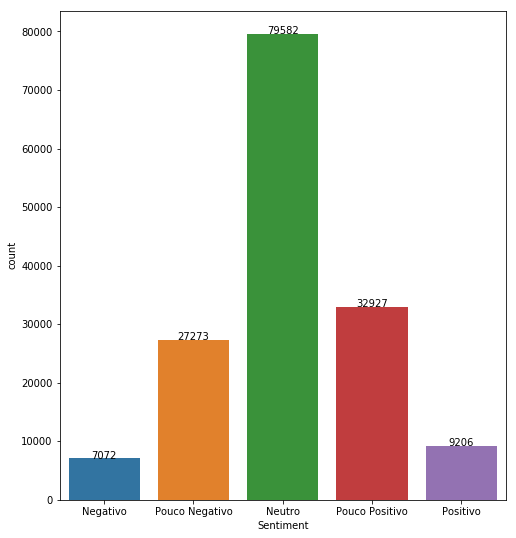

In [5]:
plt.figure(figsize=(8,9))
ax=sns.countplot(x='Sentiment',data=raw_train_data)

labels = ['Negativo','Pouco Negativo','Neutro','Pouco Positivo','Positivo']
ax.set_xticklabels(labels)

for p in ax.patches:
    height = p.get_height()
    if(np.isnan(height)):
        height=0
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            height,
            ha="center")

Podemos observar que temos mais comentários neutros, com uma porção menor de comentários negativos. A base de dados é desbalanceada.

In [6]:
print("Total de sentenças: " + str(raw_train_data['SentenceId'][-1:].values))

Total de sentenças: [8544]


Temos 8,544 reviews.

In [7]:
from nltk.tokenize import word_tokenize

# Tokenização das frases.
raw_train_data['Tokens'] = raw_train_data.apply(lambda row: word_tokenize(row['Phrase']), axis=1)

# Convertendo para minúsculo.
raw_train_data['Tokens'] = raw_train_data.apply(lambda row: map(lambda x:x.lower(),row['Tokens']),axis=1)

raw_train_data['Tokens'].head()

0    <map object at 0x7fd2046013c8>
1    <map object at 0x7fd2046014a8>
2    <map object at 0x7fd204601518>
3    <map object at 0x7fd204601588>
4    <map object at 0x7fd2046015f8>
Name: Tokens, dtype: object

In [8]:
# Removendo pontuação
punct = ['.',',',':','``','--','','\'s','\'','&','$','#','\'\'','`']

def punctremove(mylist):
    return [w for w in mylist if not w in punct]

raw_train_data['Tokens'] = raw_train_data.apply(lambda row: punctremove(row['Tokens']), axis=1)

In [9]:
from nltk.stem import WordNetLemmatizer

# Lemmatização dos tokens
lemmatizer = WordNetLemmatizer()

def lemmatizefunc(mylist):
    return [lemmatizer.lemmatize(w) for w in mylist]

raw_train_data['Tokens'] = raw_train_data.apply(lambda row: lemmatizefunc(row['Tokens']), axis=1)

raw_train_data['Tokens'].head()

0    [a, series, of, escapade, demonstrating, the, ...
1    [a, series, of, escapade, demonstrating, the, ...
2                                          [a, series]
3                                                  [a]
4                                             [series]
Name: Tokens, dtype: object

In [10]:
word_list = []
for index,value in raw_train_data['Tokens'].iteritems():
    word_list.extend(value)

vocab = set(word_list)

vocab_set = sorted(vocab)

In [11]:
# Criando um dicionário com a frequencia das palavras
vocab_freq = dict()

for value in vocab_set:
    vocab_freq[value]=0
    
for index,item in raw_train_data['Tokens'].iteritems():
    for word in item:
        vocab_freq[word] = vocab_freq[word] + 1
        
vocab_freq

{'!': 248,
 "'30s": 16,
 "'40s": 15,
 "'50s": 34,
 "'53": 7,
 "'60s": 51,
 "'70s": 68,
 "'80s": 13,
 "'90s": 13,
 "'d": 293,
 "'em": 72,
 "'ll": 484,
 "'m": 211,
 "'re": 812,
 "'til": 8,
 "'ve": 563,
 '+': 11,
 '-': 761,
 '-lrb-': 2098,
 '-rrb-': 2438,
 '...': 1884,
 '1': 37,
 '1.2': 13,
 '1.8': 17,
 '10': 117,
 '10,000': 12,
 '10-course': 7,
 '10-year': 15,
 '10-year-old': 10,
 '100': 48,
 '100-minute': 15,
 '100-year': 7,
 '101': 42,
 '102-minute': 16,
 '103-minute': 15,
 '104': 15,
 '105': 12,
 '10th': 5,
 '10th-grade': 11,
 '11': 38,
 '110': 17,
 '112-minute': 9,
 '12': 14,
 '12-year-old': 31,
 '120': 7,
 '127': 10,
 '129-minute': 9,
 '12th': 10,
 '13': 39,
 '13th': 13,
 '14-year-old': 13,
 '140': 8,
 '146': 15,
 '15': 67,
 '15-year': 11,
 '15th': 8,
 '163': 13,
 '168-minute': 8,
 '170': 19,
 '1790': 12,
 '18': 15,
 '18-year-old': 24,
 '1899': 6,
 '19': 5,
 '1915': 16,
 '1920': 16,
 '1930s': 7,
 '1933': 9,
 '1937': 10,
 '1938': 12,
 '1940s': 16,
 '1950': 10,
 '1950s': 28,
 '1952': 

In [12]:
import operator

print("Número de palavras únicas no dataset: " + str(len(vocab_set)))
sorted_vocab_freq = list(reversed(sorted(vocab_freq.items(), key=operator.itemgetter(1))))
print("Top 100 palavras mais frequentes: " + str(sorted_vocab_freq[:100]))

Número de palavras únicas no dataset: 15178
Top 100 palavras mais frequentes: [('the', 51220), ('a', 44748), ('of', 32308), ('and', 31763), ('to', 22448), ('it', 18728), ('in', 13754), ('is', 13447), ('that', 12327), ('with', 7750), ('film', 7668), ('for', 7417), ('movie', 7250), ('an', 6479), ('this', 5677), ('but', 5126), ('be', 4977), ('you', 4827), ('on', 4730), ("n't", 3970), ('by', 3918), ('more', 3906), ('his', 3827), ('one', 3783), ('about', 3682), ('not', 3562), ('at', 3550), ('or', 3472), ('from', 3462), ('than', 3458), ('all', 3201), ('have', 3134), ('like', 3092), ('are', 3059), ('ha', 2950), ('character', 2850), ('story', 2831), ('so', 2644), ('-rrb-', 2438), ('make', 2415), ('out', 2380), ('who', 2359), ('time', 2293), ('most', 2227), ('into', 2163), ('too', 2143), ('up', 2104), ('-lrb-', 2098), ('good', 2066), ('if', 1979), ('comedy', 1939), ('what', 1899), ('their', 1899), ('...', 1884), ('much', 1862), ('life', 1862), ('no', 1801), ('can', 1769), ('i', 1768), ('way', 1

Palavras como 'film' e 'story' são mais comuns nas revisões de filmes. 

In [13]:
sentences = []
sentid = 0
sentlabels = []
for index,row in raw_train_data.iterrows():
    if (sentid!=row['SentenceId']):
        sentid = row['SentenceId']
        sentlabels.append(row['Sentiment'])
        sentences.append(row['Tokens'])
sentences

[['a',
  'series',
  'of',
  'escapade',
  'demonstrating',
  'the',
  'adage',
  'that',
  'what',
  'is',
  'good',
  'for',
  'the',
  'goose',
  'is',
  'also',
  'good',
  'for',
  'the',
  'gander',
  'some',
  'of',
  'which',
  'occasionally',
  'amuses',
  'but',
  'none',
  'of',
  'which',
  'amount',
  'to',
  'much',
  'of',
  'a',
  'story'],
 ['this',
  'quiet',
  'introspective',
  'and',
  'entertaining',
  'independent',
  'is',
  'worth',
  'seeking'],
 ['even',
  'fan',
  'of',
  'ismail',
  'merchant',
  'work',
  'i',
  'suspect',
  'would',
  'have',
  'a',
  'hard',
  'time',
  'sitting',
  'through',
  'this',
  'one'],
 ['a',
  'positively',
  'thrilling',
  'combination',
  'of',
  'ethnography',
  'and',
  'all',
  'the',
  'intrigue',
  'betrayal',
  'deceit',
  'and',
  'murder',
  'of',
  'a',
  'shakespearean',
  'tragedy',
  'or',
  'a',
  'juicy',
  'soap',
  'opera'],
 ['aggressive', 'self-glorification', 'and', 'a', 'manipulative', 'whitewash'],
 ['a

*************************************

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(np.array(raw_train_data['Tokens']),
                np.array(raw_train_data['Sentiment']), test_size=0.2)

Training set: 80% Validation set: 20%